## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [5]:
#!pip install pingouin
#!pip install researchpy 

In [6]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

## 讀入資料

In [7]:
df_train = pd.read_csv("D35_Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
df_train["Survived"] = df_train["Survived"].replace(0,"dead").replace(1,"alive")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,alive,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,alive,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,dead,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,alive,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,dead,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,alive,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 確認Age, Survived, Sex, Fare有無缺失值

In [9]:
a = df_train[["Age", "Survived", "Sex", "Fare"]].isnull().sum()/len(df_train)
a.sort_values(ascending=False)

Age         0.198653
Fare        0.000000
Sex         0.000000
Survived    0.000000
dtype: float64

###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?

In [16]:
#連續對離散
import pingouin as pg
adjust_data = df_train[["Age","Survived"]].dropna()

aov= pg.anova(dv="Age", between="Survived", data=adjust_data, detailed=True)
print(aov)
print(aov.SS)
#計算相關性η2：
etaSq = aov.SS[0] / (aov.SS[0]+aov.SS[1])
print(etaSq)
#根據其區間撰寫一函數：
def valiate_etaSq(etaSq):
    if etaSq < .01:
        qual = "Negligible"
    elif etaSq < .06:
        qual = "Small"
    elif etaSq <.14:
        qual = "Medium"
    else:
        qual = "Large"
    return qual
valiate_etaSq(etaSq)

     Source             SS   DF          MS         F     p-unc       np2
0  Survived     897.187582    1  897.187582  4.271195  0.039125  0.005963
1    Within  149559.448362  712  210.055405       NaN       NaN       NaN
0       897.187582
1    149559.448362
Name: SS, dtype: float64
0.0059630974469252


'Negligible'

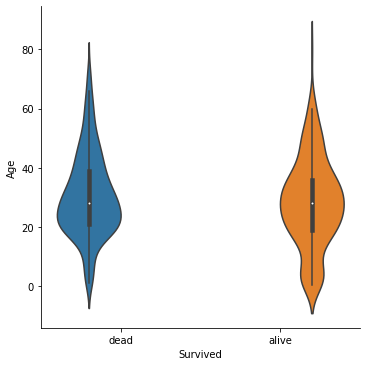

In [11]:
#小提琴圖
sns.catplot(x="Survived", y="Age", hue="Survived",
               data=adjust_data, kind="violin")

A1：年齡與是否存活沒有相關性，可能放入模型、再觀察特性、進行數值、特徵轉換

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [12]:
#離散對離散
contable = pd.crosstab(df_train["Sex"],df_train["Survived"])
df = min(contable.shape[0],contable.shape[0]) - 1
print(df)

crosstab, res = researchpy.crosstab(df_train["Sex"], df_train["Survived"], test="chi-square")
v = res.loc[2,"results"]
print(v)

def CramersV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

CramersV(df,v)        


1
0.5434


'large'

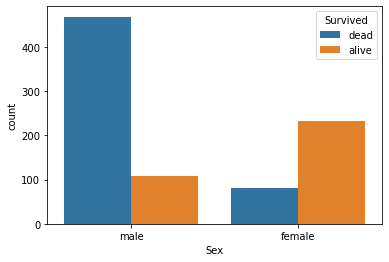

In [13]:
#計數的長條圖
sns.countplot(x="Sex", hue="Survived", data=df_train)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

方法一： 相關係數為：0.0916，P值為0.0062
方法二： 相關係數為：0.0961，P值為0.0102


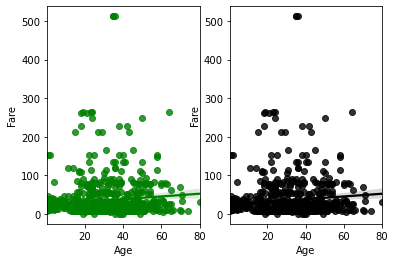

In [14]:
#連續對連續
way1_corr,way1_pvalue = stats.pearsonr(df_train["Age"].fillna(df_train["Age"].mean()),df_train["Fare"])
adjust_data = df_train[["Age","Fare"]].dropna()
way2_corr,way2_pvalue = stats.pearsonr(adjust_data["Age"],adjust_data["Fare"])
print("方法一： 相關係數為：%.4f，P值為%.4f\n方法二： 相關係數為：%.4f，P值為%.4f" % (way1_corr,way1_pvalue,way2_corr,way2_pvalue))

plt.subplot(121)
sns.regplot(x="Age", y="Fare", color="g",data=df_train)
plt.subplot(122)
sns.regplot(x="Age", y="Fare", color="k",data=adjust_data)
#代表以年齡平均補值與刪去數值對其相關係數影響相似，且皆為無相關性